In [46]:
import sys,os
sys.path.append(os.curdir+"/deep-learning-from-scratch-master")
from dataset.mnist import load_mnist

import numpy as np
from PIL import Image
import matplotlib.pylab as plt

In [19]:
(x_train, t_train), (x_text, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [20]:
t_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [21]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [83]:
def soft_max(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [18]:
img_show(x_train[0].reshape(28,28))

In [82]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [26]:
x_train.shape[0]

60000

In [31]:
batch_size = 10
batch_mask = np.random.choice(x_train.shape[0], batch_size)
x_batch = x_train[batch_mask]
x_batch.shape[0]

10

In [66]:
# 数値微分 (中心差分)
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [67]:
function_1 = lambda x: 0.01 * x**2 + 0.1*x

numerical_diff(function_1, 5)

3.999999999981796e-05


0.1999999999990898

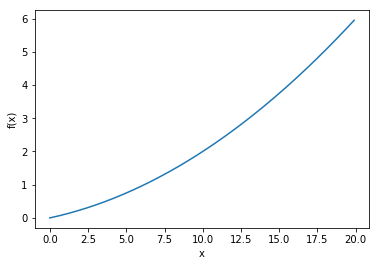

In [58]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [63]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # same size of x filled by zero

    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [64]:
function_2 = lambda x: np.sum(x**2)

In [65]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [74]:
# 勾配降下法
def gradient_decent(f, init_x, lr=0.01, step_num=100):    
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [80]:
init_x = np.array([-3.0, 4.0])
gradient_decent(function_2, init_x, lr=0.5, step_num=1000)

array([-2.91829320e-21, -2.44845461e-22])

In [89]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = soft_max(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [99]:
net = simpleNet()
net.W

array([[-0.69232952,  1.54040951,  1.57052977],
       [-1.30272575,  2.11856928,  0.28537958]])

In [100]:
x = np.array([0.6, 0.9])
p = net.predict(x)
np.argmax(p)

1

In [101]:
t = np.array([1,0,0]) # 正解ラベル
net.loss(x, t)

4.607455428534552

In [116]:
def numerical_gradient2(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [117]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient2(f, net.W)
dW

array([[-0.5940078 ,  0.49683756,  0.09717025],
       [-0.8910117 ,  0.74525633,  0.14575537]])